## Graphs & Networks

applications of linear algebra

"real" linear algebra (or linear alegbra for the real world) uses
matrices coming from somewhere

the most important model in the applied mathematics


### Graphs

nodes and edges


(-0.5, 2.0)

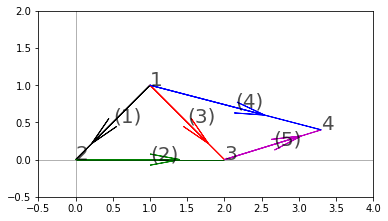

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline

import random
import numpy as np

# x, y, text
node1 = [1, 1, '1']
node2 = [0, 0, '2']
node3 = [2, 0, '3']
node4 = [3.3, 0.4, '4']

random.seed(42)
colors = list('rgbcmk') + ['orange']
def rand_color():
    c = random.choice(colors)
    colors.remove(c)
    return c

fromTos = [
    # from, to, edge label (not weight here)
    (node1, node2, '1'),
    (node1, node3, '3'),
    (node2, node3, '2'),
    (node3, node4, '5'),
    (node1, node4, '4'),
]

# quiver()
# X, Y, U, V = zip(*verts)
# plt.quiver(
#     X, Y, U, V, 
#     angles='xy', color=['r', 'g', 'b', 'c', 'm', 'y', 'k'], 
#     scale_units='xy', scale=1)

# arrow() can do
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.arrow.html
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/arrow_demo.html#sphx-glr-gallery-text-labels-and-annotations-arrow-demo-py
    
for fr, to, label in fromTos:
    vert = [fr[0], fr[1], to[0] - fr[0], to[1] - fr[1]]
    half = [vert[0], vert[1], vert[2] / 2.0, vert[3] / 2.0]
    c = rand_color()
    plt.arrow(
        *half, 
        head_width=0.15,
        head_length=0.4,
        overhang=1.0,
        color=c,
    )
    plt.arrow(
        *vert, 
        head_width=0,
        head_length=0,
        length_includes_head=True,
        overhang=1.0,
        color=c,
    )
    plt.annotate(
        f'({label})', 
        [half[0] + half[2], half[1] + half[3]], 
        size=20, 
        alpha=0.7)
    
for n in (node1, node2, node3, node4):
    plt.annotate(n[2], n[:2], size=20, alpha=0.7)

ax = plt.gca()
ax.set_aspect(1.0)
plt.axhline(0, color='black', linewidth=1, alpha=0.3)
plt.axvline(0, color='black', linewidth=1, alpha=0.3)
plt.xlim(-0.5, 4)
plt.ylim(-0.5, 2)

in the above case I have $n = 4$, which is the number of nodes;

$m = 5$ which is the number of edges;

$A_{m \ \times \ n}$ represents the graph 

edges are directional

### incidence matrix

every row corresponds to an edge; every column corresponds to
a node (from 1 to 4)

note, all the edges have no weights

$
A = \left[ \begin{array}{cccc|c}
-1 & 1 & 0 & 0 & edge 1 \\
 0 & -1& 1 & 0 & edge 2 \\
 -1& 0 & 1 & 0 & edge 3 \\
 -1& 0 & 0 & 1 & edge 4 \\
 0 & 0 & -1& 1 & edge 5
\end{array} \right]
$

#### loops and dependence

note that edge1-2-3 form a loop; their rows are dependent

row 1 + row 2 = row 3

#### sparse matrix

for large graph with not so many edges, there will a lot of
zeros - a graph/matrix that is sparse

matrices from real world problems have structures (such as
being sparsely populated)



#### the fundamental subspaces: nullspace N(A)

$N(A)$ 

are these columns independent? if so $N(A) = Z$

the nullspace tells us how to combine the columns to get zero

to solve:

$
Ax = \left[ \begin{array}{cccc}
-1 & 1 & 0 & 0 \\
 0 & -1& 1 & 0 \\
 -1& 0 & 1 & 0 \\
 -1& 0 & 0 & 1 \\
 0 & 0 & -1& 1 
\end{array} \right]
\begin{bmatrix}x_{1} \\ x_{2} \\ x_{3} \\ x_{4}\end{bmatrix}
= 0 \\
\begin{bmatrix}
x_{2} - x_{1} \\
x_{3} - x_{2} \\
x_{3} - x_{1} \\
x_{4} - x_{1} \\
x_{4} - x_{3} \end{bmatrix} = \left[ 0 \right]
$


`x = {x1, x2, x3, x4}` are the **potentials** at the nodes

solving $Ax = 0$ is to find their **potential differences**

one of the solution is `{1, 1, 1, 1}` - a constant potential

it is a basis of nullspace, its multiples span the nullspace

$
x = c \ \begin{bmatrix}
1 \\
1 \\
1 \\
1  \end{bmatrix}
$

a line in $R^4$ space, $dimN(A) = 1$

$A$ has a rank of 3 (num columns - dependent/free columns)


#### what does this mean for the application

the potential differences are what make things flow (electric
current, water flow, social networking etc.)

but there is only a constant potential

nothing will move if all the potentials are the same (constants)

#### moving on the nullspace of $A^{T}$

$A^{T}y = 0$, knowing that $dimN(A^{T}) = m -r = 5 - 3 = 2$


